In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install keras

In [ ]:
%%time
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re,nltk,json
from bs4 import BeautifulSoup
### ML Librarires--------------------
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
###-------------------------------------------
from tensorflow import keras
from tensorflow.keras.utils import plot_model
np.random.seed(42)
import string, spacy,unicodedata, random
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
import warnings
warnings.filterwarnings('ignore')
### Pretrained Word Embeddings
main_path = "/content/drive/MyDrive/SC_project/MUTE/"
models_path = "/content/drive/MyDrive/SC_project/MUTE/Models/"
results_path = "/content/drive/MyDrive/SC_project/MUTE/Results/"
memes_path = "/content/drive/MyDrive/SC_project/MUTE/"

CPU times: user 8.77 s, sys: 1.39 s, total: 10.2 s
Wall time: 20.2 s


In [ ]:
!pip install Keras-Preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.3 MB/s eta 0:00:00


In [ ]:
from keras.preprocessing import image
from tensorflow.keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.densenet import DenseNet121
from keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, GlobalAveragePooling2D, Embedding, LSTM, multiply, concatenate
from keras.models import Model
from keras import preprocessing, Input
from tensorflow import keras
from keras.models import Sequential
#Import from keras_preprocessing not from keras.preprocessing
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from tensorflow.keras.models import load_model
import itertools
from PIL import Image, ImageFile
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Concatenate, Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, Flatten,Reshape,dot,multiply
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Convolution1D,MaxPooling1D,Conv1D
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
from tensorflow.keras.layers import Add, BatchNormalization, Activation, Dropout
from tensorflow.keras.optimizers import RMSprop,Adam,SGD,Nadam
keras.backend.clear_session()

In [ ]:
train_data = pd.read_excel(main_path + 'train_hate.xlsx')
valid_data = pd.read_excel(main_path + 'valid_hate.xlsx')
test_data = pd.read_excel(main_path + 'test_hate.xlsx')

In [ ]:
print("Number of Training Data: ",len(train_data))
print("Number of Validation Data: ",len(valid_data))
print("Number of Test Data: ",len(test_data))

Number of Training Data:  3365
Number of Validation Data:  375
Number of Test Data:  416


In [ ]:
train_data['Label'].value_counts()

not-hate    2090
hate        1275
Name: Label, dtype: int64

In [ ]:
valid_data['Label'].value_counts()

not-hate    223
hate        152
Name: Label, dtype: int64

In [ ]:
test_data['Label'].value_counts()

not-hate    257
hate        159
Name: Label, dtype: int64

In [ ]:
## Replace Names
train_data['enc_label'] = train_data['Label'].replace({'hate':1,'not-hate':0})
valid_data['enc_label'] = valid_data['Label'].replace({'hate':1,'not-hate':0})
test_data['enc_label'] = test_data['Label'].replace({'hate':1,'not-hate':0})

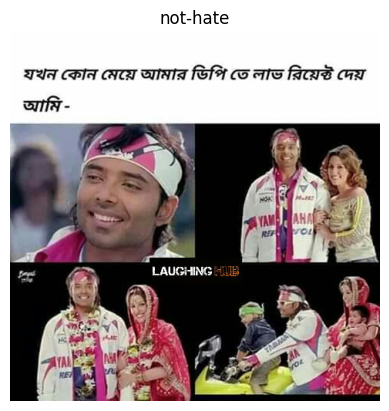

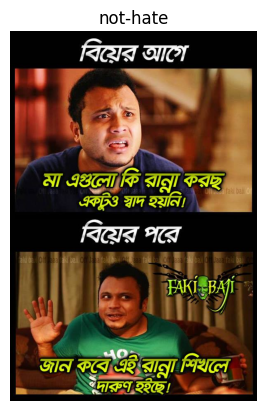

In [ ]:
from matplotlib import image as im
for i in range(2):
  data = im.imread(memes_path+'Memes/'+ train_data['image_name'][i],0)
  plt.figure()
  plt.axis('off')
  plt.imshow(data)
  plt.title(train_data['Label'][i])

'not-hate'

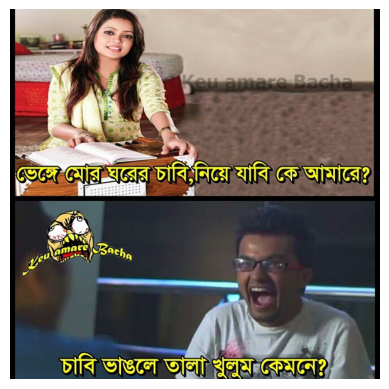

In [ ]:
n = 103
from matplotlib import image as im
data = im.imread(memes_path+'Memes/'+ test_data['image_name'][n],0)
plt.figure()
plt.axis('off')
plt.imshow(data)
#plt.title('Human Damage')
plt.savefig(results_path+"103_negative.png",bbox_inches='tight')
test_data['Label'][n]

In [ ]:
## collect image names from the folders
def create_img_array(img_dirct):
    all_imgs = []
    for root, j, files in os.walk(img_dirct):
        for file in files:
            file = root + '' + file
            all_imgs.append(file)
    return all_imgs

def create_img_path(DF, Col_name, img_dir):
    img_path = [img_dir + '' + str(name) for name in DF[Col_name]]
    return img_path

In [ ]:
# Function that returns image reading from the path
def get_input(path):
    # Loading image from given path
    # and resizing it to 128*128*3 format
    ImageFile.LOAD_TRUNCATED_IMAGES = True
    img = image.load_img(path, target_size=(128,128))
    return(img)

# Takes in image and preprocess it
def process_input(img):
    # Converting image to array
    img_data = image.img_to_array(img)
    # Adding one more dimension to array
    img_data = np.expand_dims(img_data, axis=0)
    #
    img_data = preprocess_input(img_data)
    return(img_data)

In [ ]:
img_dir = memes_path+'Memes/'
# Creating train, test and validation image path
train_img_path = create_img_path(train_data,'image_name', img_dir)
valid_img_path = create_img_path(valid_data,'image_name', img_dir)
test_img_path = create_img_path(test_data,'image_name', img_dir)

In [ ]:
# Create an array of training images
train_images = []
for i in train_img_path:
  input_img = get_input(i)
  input_img = process_input(input_img)
  train_images.append(input_img[0])
  print(i)

# convert into numpy array
train_image = np.array(train_images)
print(train_image.shape)

/content/drive/MyDrive/SC_project/MUTE/Memes/direct-offense (76).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/KAM (427).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/ovodro_img (486).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/KAM (225).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/ovodro_img (614).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/ovodro_img (515).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/ovodro_img (16).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/Bangla Thug Life (77).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/bangla-memes (41).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/Bangla Thug Life (419).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/tangaila (123).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/tangaila (305).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/Bangla Thug Life (107).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/Bangla Thug Life (100).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/ovodro_img (79).jpg
/co

In [ ]:
import pickle as pkl
with open(main_path+'train_image.pkl','wb') as f:
    pkl.dump(train_image, f)

In [ ]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
# Create an array of valid images
valid_images = []
for i in valid_img_path:
  input_img = get_input(i)
  input_img = process_input(input_img)
  valid_images.append(input_img[0])
  print(i)

# convert into numpy array
valid_image = np.array(valid_images)
print(valid_image.shape)

/content/drive/MyDrive/SC_project/MUTE/Memes/tangaila (63).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/bamboo-vaiya (183).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/bangla-gag (63).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/ovodro_img (582).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/Halal Memes (4).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/Halal Memes (228).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/tangaila (139).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/bamboo-vaiya (169).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/Halal Memes (11).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/Halal Memes (35).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/bamboo-vaiya (485).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/bamboo-vaiya (510).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/bangla-memes (210).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/Bangla Thug Life (47).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/Bangla Thug Life (214)

In [ ]:
import pickle as pkl
with open(main_path+'valid_image.pkl','wb') as f:
    pkl.dump(valid_image, f)


In [ ]:
# Create an array of test images
test_images = []
for i in test_img_path:
  input_img = get_input(i)
  input_img = process_input(input_img)
  test_images.append(input_img[0])
  print(i)

# convert into numpy array
test_image = np.array(test_images)
print(test_image.shape)

/content/drive/MyDrive/SC_project/MUTE/Memes/ovodro_img (631).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/Halal Memes (185).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/Halal Memes (328).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/Halal Memes (48).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/ovodro_img (96).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/Halal Memes (275).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/ovodro_img (310).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/tangaila (181).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/Bangla Thug Life (263).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/ovodro_img (210).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/Halal Memes (291).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/bangla-troll (1).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/bamboo-vaiya (182).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/nurani-memes (41).jpg
/content/drive/MyDrive/SC_project/MUTE/Memes/chosha (83).jpg
/cont

In [ ]:
import pickle as pkl
with open(main_path+'test_image.pkl','wb') as f:
    pkl.dump(test_image, f)


In [ ]:
import pickle as pkl

## Train image
with open(main_path+'train_image.pkl','rb') as f:
  train_image = pkl.load(f)
  print("Training Images:-- ",train_image.shape)

## Valid image
with open(main_path+'valid_image.pkl','rb') as f:
  valid_image = pkl.load(f)
  print("Valid Images:-- ",valid_image.shape)

## Test image
with open(main_path+'test_image.pkl','rb') as f:
  test_image = pkl.load(f)
  print("Test Images:-- ",test_image.shape)

Training Images:--  (3365, 128, 128, 3)
Valid Images:--  (375, 128, 128, 3)
Test Images:--  (416, 128, 128, 3)


In [ ]:

'''
Text Cleaning
'''
def text_cleaning(row):
   #to remove HTML tags
  text = BeautifulSoup(row, 'html.parser').get_text()
  d = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE) #This line is for removing url
  post = d.replace('\n', '')
  post = post.replace('—', ' ')
  post = post.replace('।', ' ')
  text = ''.join([c for c in post if c not in string.punctuation])
  # to remove special characters
  pattern = r'^\s*|\s\s*'
  text = re.sub(pattern, ' ', text).strip()
  # convert into lower case
  text = text.lower()
  # Stopword
  #result = text.split()
  #text = [word.strip() for word in result if word not in stp ]
  #text =" ".join(text)

  return text

In [ ]:
#Removing punctuations
train_data['cleaned'] = train_data['Captions'].apply(text_cleaning)
valid_data['cleaned'] = valid_data['Captions'].apply(text_cleaning)
test_data['cleaned'] = test_data['Captions'].apply(text_cleaning)

## Data samples after cleaning
print("Data samples after cleaning:\n")
for i in range(100):
  print("Original Data:===\n",train_data.Captions[i],"\nCleaned Data:===\n",train_data.cleaned[i], "\nLabel:== ",train_data.Label[i])

Data samples after cleaning:

Original Data:===
 যখন কোন মেয়ে আমার ডিপি তে লাভ রিয়েক্ট দেয় আমি-  
Cleaned Data:===
 যখন কোন মেয়ে আমার ডিপি তে লাভ রিয়েক্ট দেয় আমি 
Label:==  not-hate
Original Data:===
 বিয়ের আগে মা এগুলো কি রান্না করছ একটুও স্বাদ হয়নি! বিয়ের পরে জান কবে এই রান্না শিখলে দারুণ হইছে! 
Cleaned Data:===
 বিয়ের আগে মা এগুলো কি রান্না করছ একটুও স্বাদ হয়নি বিয়ের পরে জান কবে এই রান্না শিখলে দারুণ হইছে 
Label:==  not-hate
Original Data:===
 চিকচিক করে বালি কোথাও নাই কাঁদা মুখ খানা সাদা তার হাত দুটো কেন কালা ?  
Cleaned Data:===
 চিকচিক করে বালি কোথাও নাই কাঁদা মুখ খানা সাদা তার হাত দুটো কেন কালা 
Label:==  hate
Original Data:===
 বাংলাদেশের বিরুদ্ধে লড়তে প্রস্তুত মিয়ানমার!  আয় থাপ্পরায় ইয়াবার পিনিক নামায় দিমু! 
Cleaned Data:===
 বাংলাদেশের বিরুদ্ধে লড়তে প্রস্তুত মিয়ানমার আয় থাপ্পরায় ইয়াবার পিনিক নামায় দিমু 
Label:==  not-hate
Original Data:===
 যখন  তুমি সবে মাত্র Bathroom থেকে বেরিয়েছো আর সামনে ক্রাশকে দেখতে পাও  
Cleaned Data:===
 যখন তুমি সবে মাত্র bathroom থেকে বেরিয়েছো আর সা

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

encoded_labels = pd.DataFrame(encoder.fit_transform(train_data[['Label']]))

encoded_labels.columns = encoder.get_feature_names_out(['Label'])

train_data = pd.concat([train_data, encoded_labels], axis=1)

In [ ]:
train_data.columns

Index(['image_name', 'Captions', 'Label', 'enc_label', 'cleaned', 'Label_hate',
       'Label_not-hate'],
      dtype='object')

In [ ]:
train_data = train_data.rename(columns={'Label_hate':'Hate',
                                        'Label_not-hate':'Not-Hate'
                                       })

In [ ]:
train_data

,image_name,Captions,Label,enc_label,cleaned,Hate,Not-Hate
0,direct-offense (76).jpg,যখন কোন মেয়ে আমার ডিপি তে লাভ রিয়েক্ট দেয় আমি-,not-hate,0,যখন কোন মেয়ে আমার ডিপি তে লাভ রিয়েক্ট দেয় আমি,0.0,1.0
1,KAM (427).jpg,বিয়ের আগে মা এগুলো কি রান্না করছ একটুও স্বাদ হ...,not-hate,0,বিয়ের আগে মা এগুলো কি রান্না করছ একটুও স্বাদ হ...,0.0,1.0
2,ovodro_img (486).jpg,চিকচিক করে বালি কোথাও নাই কাঁদা মুখ খানা সাদা ...,hate,1,চিকচিক করে বালি কোথাও নাই কাঁদা মুখ খানা সাদা ...,1.0,0.0
3,KAM (225).jpg,বাংলাদেশের বিরুদ্ধে লড়তে প্রস্তুত মিয়ানমার! আ...,not-hate,0,বাংলাদেশের বিরুদ্ধে লড়তে প্রস্তুত মিয়ানমার আয় ...,0.0,1.0
4,ovodro_img (614).jpg,যখন তুমি সবে মাত্র Bathroom থেকে বেরিয়েছো আর ...,not-hate,0,যখন তুমি সবে মাত্র bathroom থেকে বেরিয়েছো আর স...,0.0,1.0
...,...,...,...,...,...,...,...
3360,KAM (146).jpg,"মামুনি, পড়তে বস! পড়মু না পড়মু না তোরে জুনায়েদে...",not-hate,0,মামুনি পড়তে বস পড়মু না পড়মু না তোরে জুনায়েদের ...,0.0,1.0
3361,bangla-memes (197).jpg,রমযান মাসঃ *approaching* শয়তানঃ বিপদের...,not-hate,0,রমযান মাসঃ approaching শয়তানঃ বিপদের গন্ধ পাচ্ছি,0.0,1.0
3362,bangla-gag (4).png,GIRLS IN REAL LIFE GIRLS IN FACEBOOK,hate,1,girls in real life girls in facebook,1.0,0.0
3363,Halal Memes (344).jpg,বোরকাওয়ালী কোন মেয়ের চোখের দিকে তাকানোর পর ! ...,not-hate,0,বোরকাওয়ালী কোন মেয়ের চোখের দিকে তাকানোর পর আমিঃ,0.0,1.0


In [ ]:
## Individual tweets length calculation
def char_length(row):
    return len(row.split())


lables = ['Hate','Not-Hate']
# Count number of unique words in each set
def dataset_statistics(dataset):
  for l in lables:
    word_list = [word.strip() for t in list(dataset[dataset[l]==1].cleaned) for word in t.strip().split()]
    counts = dict()
    for word in word_list:
        counts[word] = counts.get(word, 0)+1
      # sort the dictionary of word list
    ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
    print(f"\nClass Name:--> {l} ")
    print("Number of Words:{}".format(len(word_list)))
    print("Number of Unique Words:{}".format(len(np.unique(word_list))))
    print("Maximum Caption length: {}".format(max(dataset[dataset[l]==1].cleaned.apply(char_length))))
    print("Minimum Caption length: {}".format(min(dataset[dataset[l]==1].cleaned.apply(char_length))))
    print("Average Words in texts: {}".format(np.mean(dataset[dataset[l]==1].cleaned.apply(char_length))))
    print(color.BOLD+"\nMost Frequent Words:\n"+color.END)
    for k,v in ordered[:10]:
      print("{}\t{}".format(k,v))


In [ ]:
dataset_statistics(train_data)


Class Name:--> Hate 
Number of Words:16900
Number of Unique Words:6036
Maximum Caption length: 63
Minimum Caption length: 1
Average Words in texts: 13.254901960784315

Most Frequent Words:

না	241
আমার	159
আমি	158
যখন	125
করে	123
আর	104
কি	99
you	97
তো	91
পর	77

Class Name:--> Not-Hate 
Number of Words:30684
Number of Unique Words:8916
Maximum Caption length: 106
Minimum Caption length: 1
Average Words in texts: 14.68133971291866

Most Frequent Words:

না	506
আমি	429
আমার	303
কি	288
যখন	269
আর	210
করে	208
তো	174
you	150
me	147


In [ ]:
### Plot a Distribution
def sentence_length_per_class(dataset,set_name):
  label = dataset[['Hate','Not-Hate']]
  label = label.values
  comment = dataset['cleaned']
  comment = comment.values
  y = np.zeros(label.shape)
  for ix in range(comment.shape[0]):
      l = len(comment[ix].split())
      if label[ix][0] :
          y[ix][0] = l
      if label[ix][1] :
          y[ix][1] = l

  labelsplt = ['Hate','Not-Hate' ]
  color = ['red','green']
  bins = [1,5,10,15,20,25,30,35,40,45,50,55,60]
  plt.figure(figsize=(5,3))
  #plt.title ('Tweets Length Distribution Per Class')
  plt.hist(y,bins = bins,label = labelsplt,color = color)
  plt.axis([0, 40, 0, 800])
  plt.xlabel('Length of the Caption')
  plt.ylabel('Number of Captions ')
  plt.legend()
  #plt.savefig(results_path+'length-dist.png',dpi = 600,bbox_inches ='tight')
  #plt.grid(True)
  plt.show()

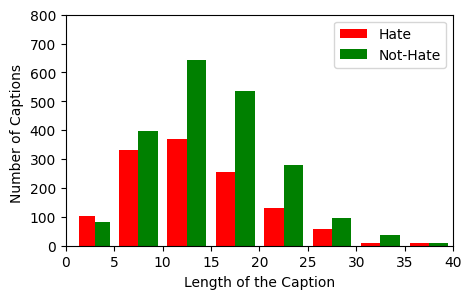

In [ ]:
sentence_length_per_class(train_data,'Training')

In [ ]:
## Individual tweets length calculation
def char_length(row):
    return len(row.split())

lables = ['Hate','Not-Hate']
# Count number of unique words in each set

final_list = []

for l in lables:
  label_wise_word_list = []
  word_list = [word.strip() for t in list(train_data[train_data[l]==1].cleaned) for word in t.strip().split()]
  counts = dict()
  for word in word_list:
      counts[word] = counts.get(word,0) + 1
      # sort the dictionary of word list
  ordered = sorted(counts.items(), key= lambda item: item[1], reverse = True)
  print(f"\nClass Name:--> {l} ")

  for k,v in ordered[:400]:
    label_wise_word_list.append(k)

  final_list.append(label_wise_word_list)


Class Name:--> Hate 

Class Name:--> Not-Hate 


In [ ]:
def jaccard_similarity(list1, list2):
    s1 = set(list1)
    s2 = set(list2)
    return float(len(s1.intersection(s2)) / len(s1.union(s2)))

In [ ]:
jaccard_similarity(final_list[0],final_list[1])

0.49812734082397003

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Calculate TF-IDF
vectorizer = TfidfVectorizer(max_features=500)
tfidf_matrix = vectorizer.fit_transform(train_data['cleaned'])
train_data['tfidf'] = list(tfidf_matrix.toarray())
train_data[["tfidf", "Label"]].head(2)

,tfidf,Label
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",not-hate
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",not-hate


In [ ]:
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go

# PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(list(train_data['tfidf']))
train_data['pca'] = list(principalComponents)

# Scatterplot
pca_df = pd.DataFrame(train_data['pca'].tolist(), columns = ['principal component 1', 'principal component 2'])
pca_df['Label'] = train_data['Label']
fig = px.scatter(pca_df, x='principal component 1', y='principal component 2', color='Label')
fig.update_layout(title='PCA Multimodal Hate')
fig.show()

In [ ]:
'''Evaluation Parameters'''

def print_metrices(true,pred):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,target_names=['not-hate','hate']))
    print("Accuracy : ",accuracy_score(true,pred))
    print("Precison : ",precision_score(true,pred, average = 'weighted'))
    print("Recall : ",recall_score(true,pred,  average = 'weighted'))
    print("F1 : ",f1_score(true,pred,  average = 'weighted'))

In [ ]:
''' Callbacks'''
keras.backend.clear_session()
def callbacks_with_garbage(model_name):
  accuracy_threshold = 0.98

  class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>accuracy_threshold):
          print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
          self.model.stop_training = True

  # Garbage Collector - use it like gc.collect()
  import gc
  # Custom Callback To Include in Callbacks List At Training Time
  class GarbageCollectorCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        gc.collect()


  acc_callback = myCallback()
  gc_callback = GarbageCollectorCallback()
  # Saved the Best Model
  filepath = models_path+f"{model_name}.h5"
  checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
  callback_list = [acc_callback, gc_callback, checkpoint]

  return callback_list

In [ ]:
''' Callbacks'''
keras.backend.clear_session()
def callbacks_check(model_name):
  accuracy_threshold = 0.98

  class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>accuracy_threshold):
          print("\nReached %2.2f%% accuracy so we will stop trianing" % (accuracy_threshold*100))
          self.model.stop_training = True

  acc_callback = myCallback()
  # Saved the Best Model
  filepath = models_path+f"{model_name}.h5"
  checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=False, mode='max')
  # callback list
  callback_list = [acc_callback, checkpoint]

  return callback_list

In [ ]:
from sklearn.utils import compute_class_weight
class_weights = compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(train_data['enc_label']),
                                        y = train_data['enc_label']
                                    )
weight = {i : class_weights[i] for i in range(2)}
weight

{0: 0.8050239234449761, 1: 1.3196078431372549}

#Visual Model

In [ ]:
def visual_models(pretrained_model):
  '''
      Input: Pretrained Models weight
  '''
  base_model = pretrained_model
  base_model.trainable = False
  y = base_model.output
  pool = GlobalAveragePooling2D()(y)
  #flatten = Flatten()(pool)
  output = Dense(1, activation='sigmoid')(pool)
  # this is the model we will train
  img_model = Model(inputs=base_model.input, outputs=output)

  return img_model

In [ ]:
vgg19 = VGG19(weights='imagenet', include_top=False,input_shape=(128, 128, 3))
vgg16 = VGG16(weights='imagenet', include_top=False,input_shape=(128, 128, 3))
resnet = ResNet50(weights='imagenet', include_top=False,input_shape=(128, 128, 3))

94765736/94765736 [==============================] - 1s 0us/step


#VGG19

In [ ]:
vgg19_model = visual_models(vgg19)
vgg19_model.compile(loss='binary_crossentropy',
                    optimizer=Adam(),
                    metrics = ["accuracy"])

In [ ]:
keras.backend.clear_session()
vgg19_model.fit(x=train_image,
              y=train_data['enc_label'],
              epochs = 15,
              batch_size = 8,
              validation_data = (valid_image,valid_data['enc_label']),
              verbose = 1,
              class_weight = weight,
              callbacks = callbacks_check('vgg19')
              )

Epoch 1/15
421/421 [==============================] - ETA: 0s - loss: 2.0102 - accuracy: 0.5474
Epoch 1: val_accuracy improved from -inf to 0.58667, saving model to /content/drive/MyDrive/SC_project/MUTE/Models/vgg19.h5
421/421 [==============================] - 24s 46ms/step - loss: 2.0102 - accuracy: 0.5474 - val_loss: 1.4093 - val_accuracy: 0.5867
Epoch 2/15
420/421 [============================>.] - ETA: 0s - loss: 1.1457 - accuracy: 0.6167
Epoch 2: val_accuracy did not improve from 0.58667
421/421 [==============================] - 11s 26ms/step - loss: 1.1445 - accuracy: 0.6172 - val_loss: 1.1719 - val_accuracy: 0.5813
Epoch 3/15
420/421 [============================>.] - ETA: 0s - loss: 0.8881 - accuracy: 0.6336
Epoch 3: val_accuracy improved from 0.58667 to 0.61600, saving model to /content/drive/MyDrive/SC_project/MUTE/Models/vgg19.h5
421/421 [==============================] - 13s 31ms/step - loss: 0.8884 - accuracy: 0.6333 - val_loss: 0.9399 - val_accuracy: 0.6160
Epoch 4/15


13/13 [==============================] - 5s 47ms/step
[[171  86]
 [ 83  76]]
              precision    recall  f1-score   support

    not-hate       0.67      0.67      0.67       257
        hate       0.47      0.48      0.47       159

    accuracy                           0.59       416
   macro avg       0.57      0.57      0.57       416
weighted avg       0.60      0.59      0.59       416

Accuracy :  0.59375
Precison :  0.5952218212306796
Recall :  0.59375
F1 :  0.5944558498088777
Confusion Matrix:
[[171  86]
 [ 83  76]]


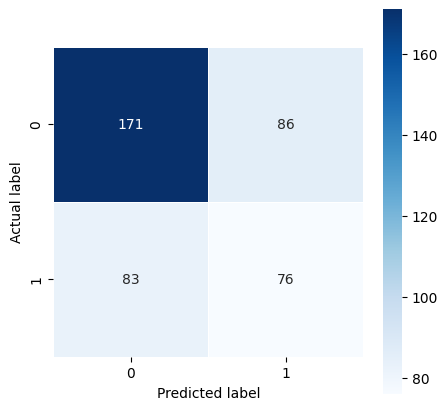

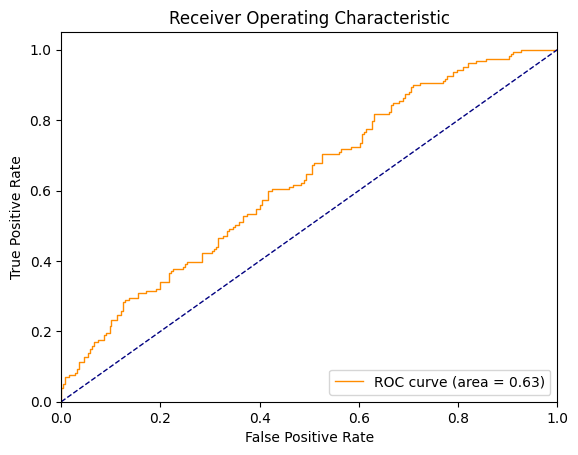

In [ ]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

 # Prediction
model = load_model(models_path+"vgg19.h5")
pred = model.predict(test_image)
y_pred = (pred>0.5).astype(int)
y_pred

y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

# Print the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Compute false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_true, pred)
roc_auc = auc(fpr, tpr)

# Plot ROC AUC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#VGG16

In [ ]:
keras.backend.clear_session()
vgg16_model = visual_models(vgg16)
vgg16_model.compile(loss='binary_crossentropy',
                    optimizer=RMSprop(),
                    metrics = ["accuracy"])

In [ ]:
vgg16_model.fit(x=train_image,
              y=train_data['enc_label'],
              epochs=15,
              batch_size =8,
              validation_data = (valid_image,valid_data['enc_label']),
              verbose = 1,
              class_weight = weight,
              callbacks = callbacks_check('vgg16')
              )

Epoch 1/15
421/421 [==============================] - ETA: 0s - loss: 2.4041 - accuracy: 0.5355
Epoch 1: val_accuracy improved from -inf to 0.59733, saving model to /content/drive/MyDrive/SC_project/MUTE/Models/vgg16.h5
421/421 [==============================] - 15s 33ms/step - loss: 2.4041 - accuracy: 0.5355 - val_loss: 1.4601 - val_accuracy: 0.5973
Epoch 2/15
420/421 [============================>.] - ETA: 0s - loss: 1.2643 - accuracy: 0.5940
Epoch 2: val_accuracy improved from 0.59733 to 0.63733, saving model to /content/drive/MyDrive/SC_project/MUTE/Models/vgg16.h5
421/421 [==============================] - 9s 22ms/step - loss: 1.2638 - accuracy: 0.5941 - val_loss: 1.2827 - val_accuracy: 0.6373
Epoch 3/15
421/421 [==============================] - ETA: 0s - loss: 1.0007 - accuracy: 0.6303
Epoch 3: val_accuracy did not improve from 0.63733
421/421 [==============================] - 9s 22ms/step - loss: 1.0007 - accuracy: 0.6303 - val_loss: 1.0429 - val_accuracy: 0.6240
Epoch 4/15
42

13/13 [==============================] - 1s 43ms/step
[[173  84]
 [ 77  82]]
              precision    recall  f1-score   support

    not-hate       0.69      0.67      0.68       257
        hate       0.49      0.52      0.50       159

    accuracy                           0.61       416
   macro avg       0.59      0.59      0.59       416
weighted avg       0.62      0.61      0.61       416

Accuracy :  0.6129807692307693
Precison :  0.6163129054680259
Recall :  0.6129807692307693
F1 :  0.6144769382491276
Confusion Matrix:
[[173  84]
 [ 77  82]]


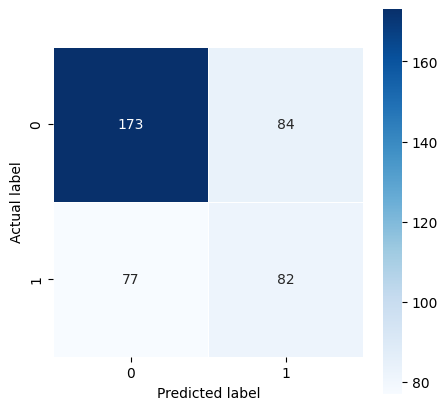

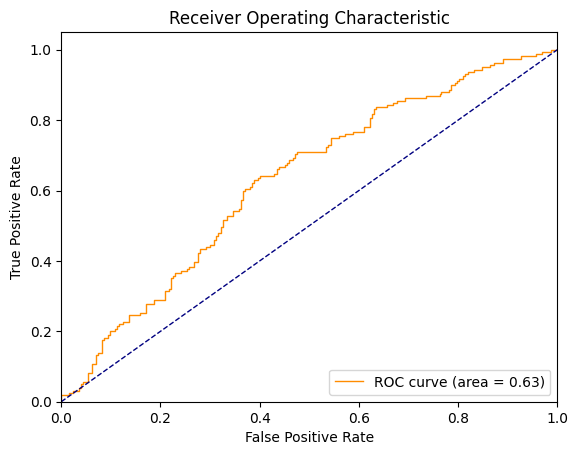

In [ ]:
 # Prediction
model = load_model(models_path+"vgg16.h5")
pred = model.predict(test_image)
y_pred = (pred>0.5).astype(int)
y_pred

y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

# Print the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Compute false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_true, pred)
roc_auc = auc(fpr, tpr)

# Plot ROC AUC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#ResNet50

In [ ]:
keras.backend.clear_session()
resnet_model = visual_models(resnet)
resnet_model.compile(loss='binary_crossentropy',
                    optimizer=RMSprop(),
                    metrics = ["accuracy"])

In [ ]:
resnet_model.fit(x=train_image,
              y=train_data['enc_label'],
              epochs=15,
              batch_size = 8,
              validation_data = (valid_image,valid_data['enc_label']),
              verbose = 1,
              class_weight = weight,
              callbacks = callbacks_check('resnet')
              )

Epoch 1/15
421/421 [==============================] - ETA: 0s - loss: 0.7638 - accuracy: 0.6045
Epoch 1: val_accuracy improved from -inf to 0.58133, saving model to /content/drive/MyDrive/SC_project/MUTE/Models/resnet.h5
421/421 [==============================] - 21s 40ms/step - loss: 0.7638 - accuracy: 0.6045 - val_loss: 0.7860 - val_accuracy: 0.5813
Epoch 2/15
419/421 [============================>.] - ETA: 0s - loss: 0.6513 - accuracy: 0.6703
Epoch 2: val_accuracy did not improve from 0.58133
421/421 [==============================] - 7s 17ms/step - loss: 0.6511 - accuracy: 0.6704 - val_loss: 0.8453 - val_accuracy: 0.5467
Epoch 3/15
419/421 [============================>.] - ETA: 0s - loss: 0.6133 - accuracy: 0.6844
Epoch 3: val_accuracy improved from 0.58133 to 0.59733, saving model to /content/drive/MyDrive/SC_project/MUTE/Models/resnet.h5
421/421 [==============================] - 9s 22ms/step - loss: 0.6142 - accuracy: 0.6844 - val_loss: 0.8298 - val_accuracy: 0.5973
Epoch 4/15


13/13 [==============================] - 1s 44ms/step
[[173  84]
 [ 77  82]]
              precision    recall  f1-score   support

    not-hate       0.69      0.67      0.68       257
        hate       0.49      0.52      0.50       159

    accuracy                           0.61       416
   macro avg       0.59      0.59      0.59       416
weighted avg       0.62      0.61      0.61       416

Accuracy :  0.6129807692307693
Precison :  0.6163129054680259
Recall :  0.6129807692307693
F1 :  0.6144769382491276
Confusion Matrix:
[[173  84]
 [ 77  82]]


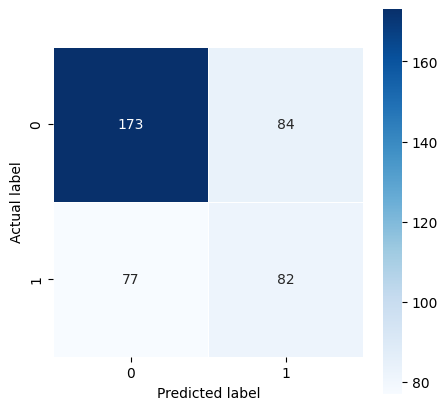

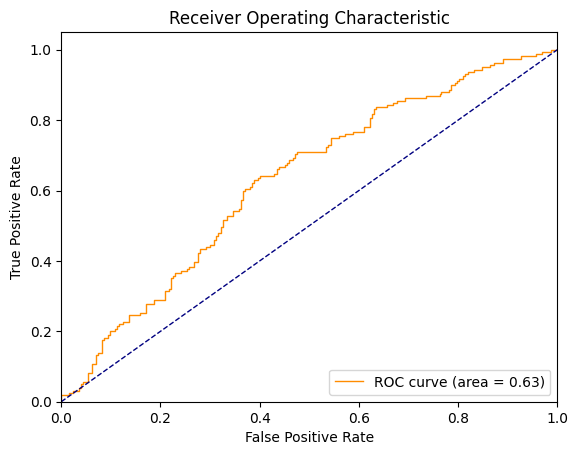

In [ ]:
 # Prediction
model = load_model(models_path+"vgg16.h5")
pred = model.predict(test_image)
y_pred = (pred>0.5).astype(int)
y_pred

y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

# Print the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Compute false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_true, pred)
roc_auc = auc(fpr, tpr)

# Plot ROC AUC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#VGG16 + PixelAttention

In [ ]:
keras.backend.clear_session()
vgg16_att_model = visual_models(vgg16)
vgg16_att_model.compile(loss='binary_crossentropy',
                    optimizer=RMSprop(),
                    metrics = ["accuracy"])

In [ ]:
vgg16_att_model.fit(x=train_image,
              y=train_data['enc_label'],
              epochs=15,
              batch_size =16,
              validation_data = (valid_image,valid_data['enc_label']),
              verbose = 1,
              class_weight = weight,
              callbacks = callbacks_check('vgg16-att-channel')
              )

Epoch 1/15
210/211 [============================>.] - ETA: 0s - loss: 1.9960 - accuracy: 0.5539
Epoch 1: val_accuracy improved from -inf to 0.54133, saving model to /content/drive/MyDrive/SC_project/MUTE/Models/vgg16-att-channel.h5
211/211 [==============================] - 13s 47ms/step - loss: 1.9973 - accuracy: 0.5533 - val_loss: 1.6701 - val_accuracy: 0.5413
Epoch 2/15
210/211 [============================>.] - ETA: 0s - loss: 1.2558 - accuracy: 0.6015
Epoch 2: val_accuracy did not improve from 0.54133
211/211 [==============================] - 6s 28ms/step - loss: 1.2540 - accuracy: 0.6021 - val_loss: 1.5564 - val_accuracy: 0.5013
Epoch 3/15
211/211 [==============================] - ETA: 0s - loss: 0.9831 - accuracy: 0.6181
Epoch 3: val_accuracy did not improve from 0.54133
211/211 [==============================] - 6s 29ms/step - loss: 0.9831 - accuracy: 0.6181 - val_loss: 1.3939 - val_accuracy: 0.5120
Epoch 4/15
210/211 [============================>.] - ETA: 0s - loss: 0.8419 

In [ ]:
vgg16_att_model.save_weights(models_path+'vgg16-att-channel')

In [ ]:
# Prediction
model = vgg16_att_model.load_weights(models_path+"vgg16-att-channel")
pred = vgg16_att_model.predict(test_image)
y_pred = (pred>0.4).astype(int)


y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

13/13 [==============================] - 1s 45ms/step
[[115 142]
 [ 35 124]]
              precision    recall  f1-score   support

    not-hate       0.77      0.45      0.57       257
        hate       0.47      0.78      0.58       159

    accuracy                           0.57       416
   macro avg       0.62      0.61      0.57       416
weighted avg       0.65      0.57      0.57       416

Accuracy :  0.5745192307692307
Precison :  0.6518116203971468
Recall :  0.5745192307692307
F1 :  0.5721504608269314


#Textual Models

In [ ]:
''' Tokenizer '''

def text_tokenizer(train_data,test_data,vocabulary,max_len,sample_text_num):

  tokenizer = Tokenizer(num_words = vocabulary ,filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n-',
                        split=' ', char_level=False, oov_token='', document_count=0)
  tokenizer.fit_on_texts(train_data['Captions'])
  word_index = tokenizer.word_index
  vocab_size = len(word_index)+1

  # Training Sequences
  train_sequences = tokenizer.texts_to_sequences(train_data['Captions'])
  train_pad_sequences =  keras.preprocessing.sequence.pad_sequences(train_sequences, value=0.0, padding='post', maxlen= max_len)


  # Validation Sequences
  valid_sequences = tokenizer.texts_to_sequences(valid_data['Captions'])
  valid_pad_sequences =  keras.preprocessing.sequence.pad_sequences(valid_sequences, value=0.0, padding='post', maxlen= max_len)


  # Test Sequences
  test_sequences = tokenizer.texts_to_sequences(test_data['Captions'])
  test_pad_sequences =  keras.preprocessing.sequence.pad_sequences(test_sequences, value=0.0, padding='post', maxlen= max_len)


  print(color.BOLD+"\n\t\t\t====== Encoded Sequences ======"+color.END,"\n")
  print(train_data.Captions[sample_text_num],"\n",train_sequences[sample_text_num])
  print(color.BOLD+"\n\t\t\t====== Paded Sequences ======\n"+color.END,"\n",train_pad_sequences[sample_text_num])

  return train_pad_sequences, valid_pad_sequences, test_pad_sequences, vocab_size, word_index


vocabulary = 15000
max_len = 50
sample_text_num = 10

## Call Tokenizer
train_pad_sequences, valid_pad_sequences, test_pad_sequences, vocab_size, word_index =  text_tokenizer(train_data,test_data,
                                                                      vocabulary,max_len,sample_text_num)

print("Number of Train Sequences :" ,train_pad_sequences.shape)
print("Number of Test Sequences :" ,test_pad_sequences.shape)
print("Vocabulary Size: ",vocab_size)


			====== Encoded Sequences ====== 

ভার্সিটির বড় ভাই    আমি*    কুমুদিনীর মেয়ে  
 [1442, 63, 39, 3, 467, 41]

			====== Paded Sequences ======
 
 [1442   63   39    3  467   41    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
Number of Train Sequences : (3365, 50)
Number of Test Sequences : (416, 50)
Vocabulary Size:  11993


#BiLSTM+CNN

In [ ]:
##### LSTM-CNN Model ####
lc_text_inputs = Input(shape=(max_len,))
lc_embedding_layer = Embedding(vocab_size,64)(lc_text_inputs)
LSTM_Layer = Bidirectional(LSTM(32,return_sequences=True))(lc_embedding_layer)
lc_conv1 = Conv1D(32,2,activation='relu')(LSTM_Layer)
lc_pool1 = MaxPooling1D(2)(lc_conv1)
lc_flat = Flatten()(lc_pool1)
lc_dense_layer_1 = Dense(1, activation='sigmoid')(lc_flat)
cnn_lstm_model = Model(inputs=lc_text_inputs, outputs=lc_dense_layer_1)

In [ ]:
keras.backend.clear_session()
cnn_lstm_model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])


cnn_lstm_model.fit(train_pad_sequences,
    train_data['enc_label'],
    epochs=15,
    batch_size =32,
    validation_data = (valid_pad_sequences,valid_data['enc_label']),
    verbose = 1,
    class_weight = weight,
    callbacks = callbacks_check('lstm-cnn'))

Epoch 1/15
106/106 [==============================] - ETA: 0s - loss: 0.6833 - accuracy: 0.5658
Epoch 1: val_accuracy improved from -inf to 0.61867, saving model to /content/drive/MyDrive/SC_project/MUTE/Models/lstm-cnn.h5
106/106 [==============================] - 25s 168ms/step - loss: 0.6833 - accuracy: 0.5658 - val_loss: 0.6463 - val_accuracy: 0.6187
Epoch 2/15
106/106 [==============================] - ETA: 0s - loss: 0.4473 - accuracy: 0.8015
Epoch 2: val_accuracy improved from 0.61867 to 0.63733, saving model to /content/drive/MyDrive/SC_project/MUTE/Models/lstm-cnn.h5
106/106 [==============================] - 7s 60ms/step - loss: 0.4473 - accuracy: 0.8015 - val_loss: 0.7236 - val_accuracy: 0.6373
Epoch 3/15
106/106 [==============================] - ETA: 0s - loss: 0.1285 - accuracy: 0.9575
Epoch 3: val_accuracy did not improve from 0.63733
106/106 [==============================] - 4s 37ms/step - loss: 0.1285 - accuracy: 0.9575 - val_loss: 1.0300 - val_accuracy: 0.6027
Epoch 

13/13 [==============================] - 2s 7ms/step
[[197  60]
 [ 79  80]]
              precision    recall  f1-score   support

    not-hate       0.71      0.77      0.74       257
        hate       0.57      0.50      0.54       159

    accuracy                           0.67       416
   macro avg       0.64      0.63      0.64       416
weighted avg       0.66      0.67      0.66       416

Accuracy :  0.6658653846153846
Precison :  0.6593642996496256
Recall :  0.6658653846153846
F1 :  0.6612045624250942
Confusion Matrix:
[[197  60]
 [ 79  80]]


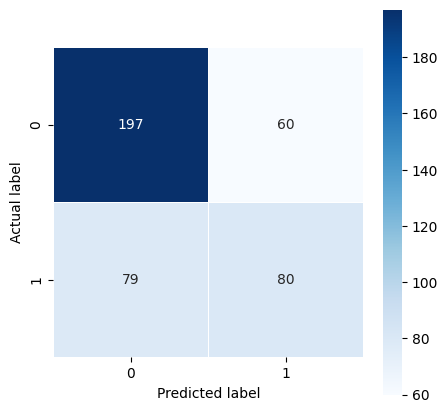

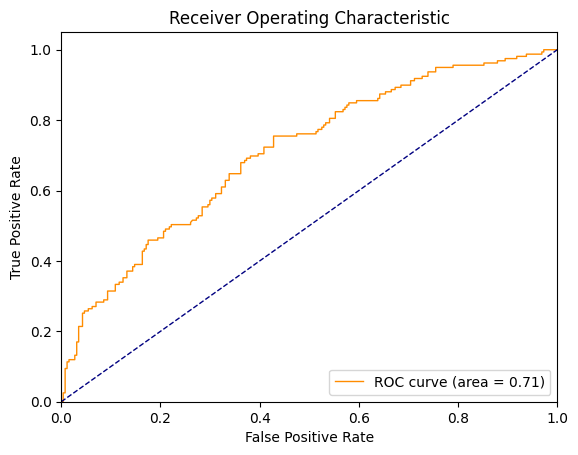

In [ ]:
 # Prediction
model = load_model(models_path+"lstm-cnn.h5")
pred = model.predict(test_pad_sequences)
y_pred = (pred>0.5).astype(int)
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)


# Print the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Compute false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_true, pred)
roc_auc = auc(fpr, tpr)

# Plot ROC AUC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
!pip install transformers

In [ ]:
############################## Sentence Encoding for Transformers

def bert_encode(data,maximum_length,tokenizer) :
  input_ids = []
  attention_masks = []


  for i in range(len(data.Captions)):
      encoded = tokenizer.encode_plus(

        data.Captions[i],
        add_special_tokens=True,
        max_length=maximum_length,
        pad_to_max_length=True,
        truncation=True,
        return_attention_mask=True,

      )

      input_ids.append(encoded['input_ids'])
      attention_masks.append(encoded['attention_mask'])
  return np.array(input_ids),np.array(attention_masks)

In [ ]:
#######################################             Model Defination
def create_model(bert_model,max_len):
  input_ids = Input(shape=(max_len,),dtype='int32')
  attention_masks = Input(shape=(max_len,),dtype='int32')
  output = bert_model([input_ids,attention_masks])
  output = output[0]                                ## 0 for distillbert
  #output = Dense(32,activation='relu')(output[:, 0, :])
  #output = Dropout(0.1)(output)
  output = Dense(1,activation='sigmoid')(output[:, 0, :])
  model = Model(inputs = [input_ids,attention_masks],outputs = output)
  return model

#Bangla-BERT

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('sagorsarker/bangla-bert-base')

vocab.txt:   0%|          | 0.00/2.24M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/491 [00:00<?, ?B/s]

In [ ]:
train_input_ids,train_attention_masks = bert_encode(train_data,50,tokenizer)
valid_input_ids,valid_attention_masks = bert_encode(valid_data,50,tokenizer)
test_input_ids,test_attention_masks = bert_encode(test_data,50,tokenizer)

In [ ]:
from transformers import TFBertModel
bert_model = TFBertModel.from_pretrained('sagorsarker/bangla-bert-base')

model.safetensors:   0%|          | 0.00/660M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
### Checkpoint
filepath = models_path + 'bangla-bert-1.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=True, mode='max' )

In [ ]:
keras.backend.clear_session()
# 3e-4, 1e-4, 5e-5, 3e-5,1e-5
model = create_model(bert_model,50)
model.compile(Adam(lr=3e-5), loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()


In [ ]:
model.fit([train_input_ids,train_attention_masks],
                    train_data['enc_label'],
                    validation_data = ([valid_input_ids,valid_attention_masks], valid_data['enc_label']),
                    epochs=6,
                    batch_size=16,
                    callbacks = [checkpoint],
                    # class_weight = weight
          )

Epoch 1/6


211/211 [==============================] - ETA: 0s - loss: 0.9013 - accuracy: 0.5626
Epoch 1: val_accuracy improved from -inf to 0.59467, saving model to /content/drive/MyDrive/SC_project/MUTE/Models/bangla-bert-1.h5
211/211 [==============================] - 158s 317ms/step - loss: 0.9013 - accuracy: 0.5626 - val_loss: 0.6753 - val_accuracy: 0.5947
Epoch 2/6
211/211 [==============================] - ETA: 0s - loss: 0.7026 - accuracy: 0.5736
Epoch 2: val_accuracy did not improve from 0.59467
211/211 [==============================] - 46s 216ms/step - loss: 0.7026 - accuracy: 0.5736 - val_loss: 0.8485 - val_accuracy: 0.5947
Epoch 3/6
211/211 [==============================] - ETA: 0s - loss: 0.6831 - accuracy: 0.5929
Epoch 3: val_accuracy did not improve from 0.59467
211/211 [==============================] - 44s 209ms/step - loss: 0.6831 - accuracy: 0.5929 - val_loss: 0.6761 - val_accuracy: 0.5947
Epoch 4/6
211/211 [==============================] - ETA: 0s - loss: 0.6765 - accuracy: 

13/13 [==============================] - 4s 104ms/step
[[257   0]
 [159   0]]
              precision    recall  f1-score   support

    not-hate       0.62      1.00      0.76       257
        hate       0.00      0.00      0.00       159

    accuracy                           0.62       416
   macro avg       0.31      0.50      0.38       416
weighted avg       0.38      0.62      0.47       416

Accuracy :  0.6177884615384616
Precison :  0.3816625832100592
Recall :  0.6177884615384616
F1 :  0.47183249514230197
Confusion Matrix:
[[257   0]
 [159   0]]


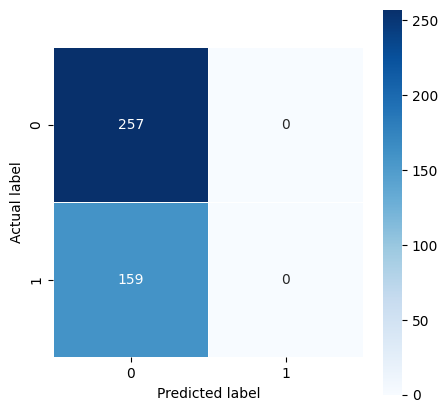

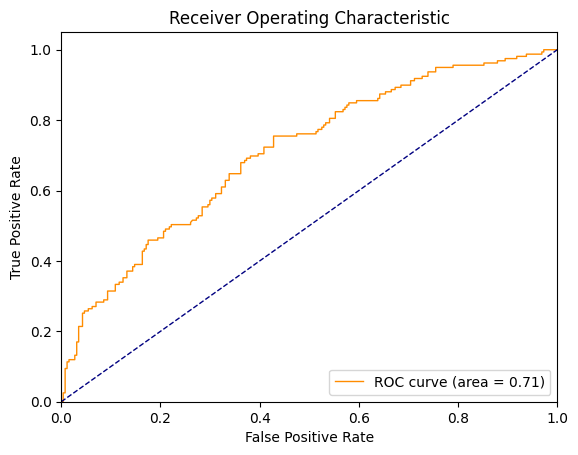

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

model2 = create_model(bert_model,50)
model2.load_weights(models_path+"bangla-bert-1.h5")
y_pred = (model2.predict([test_input_ids,test_attention_masks])>0.5).astype(int)
#y_pred = np.argmax(pred,axis=1)
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

# Print the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Compute false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_true, pred)
roc_auc = auc(fpr, tpr)

# Plot ROC AUC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# M-BERT

In [ ]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [ ]:
train_input_ids,train_attention_masks = bert_encode(train_data,50,tokenizer)
valid_input_ids,valid_attention_masks = bert_encode(valid_data,50,tokenizer)
test_input_ids,test_attention_masks = bert_encode(test_data,50,tokenizer)

In [ ]:
from transformers import TFBertModel
bert_model = TFBertModel.from_pretrained('bert-base-multilingual-cased')

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
### Checkpoint
filepath = models_path + 'm-bert.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=True, mode='max' )

In [ ]:
keras.backend.clear_session()
# 3e-4, 1e-4, 5e-5, 3e-5,1e-5
model = create_model(bert_model,50)
model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()

In [ ]:
model.fit([train_input_ids,train_attention_masks],
                    train_data['enc_label'],
                    validation_data = ([valid_input_ids,valid_attention_masks], valid_data['enc_label']),
                    epochs=6,
                    batch_size=16,
                    callbacks = [checkpoint]
                    # class_weight = weight
          )

Epoch 1/6


211/211 [==============================] - ETA: 0s - loss: 0.7598 - accuracy: 0.5973
Epoch 1: val_accuracy improved from -inf to 0.59467, saving model to /content/drive/MyDrive/SC_project/MUTE/Models/m-bert.h5
211/211 [==============================] - 102s 285ms/step - loss: 0.7598 - accuracy: 0.5973 - val_loss: 0.6754 - val_accuracy: 0.5947
Epoch 2/6
211/211 [==============================] - ETA: 0s - loss: 0.6753 - accuracy: 0.6116
Epoch 2: val_accuracy did not improve from 0.59467
211/211 [==============================] - 47s 220ms/step - loss: 0.6753 - accuracy: 0.6116 - val_loss: 0.6844 - val_accuracy: 0.5947
Epoch 3/6
211/211 [==============================] - ETA: 0s - loss: 0.6723 - accuracy: 0.6036
Epoch 3: val_accuracy did not improve from 0.59467
211/211 [==============================] - 45s 212ms/step - loss: 0.6723 - accuracy: 0.6036 - val_loss: 0.7555 - val_accuracy: 0.5947
Epoch 4/6
211/211 [==============================] - ETA: 0s - loss: 0.6728 - accuracy: 0.6166


In [ ]:
model2 = create_model(bert_model,50)
model2.load_weights(models_path+"m-bert.h5")
y_pred = (model2.predict([test_input_ids,test_attention_masks])>0.5).astype(int)
#y_pred = np.argmax(pred,axis=1)
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

# Print the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Compute false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_true, pred)
roc_auc = auc(fpr, tpr)

# Plot ROC AUC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

13/13 [==============================] - 3s 104ms/step
[[257   0]
 [159   0]]
              precision    recall  f1-score   support

    not-hate       0.62      1.00      0.76       257
        hate       0.00      0.00      0.00       159

    accuracy                           0.62       416
   macro avg       0.31      0.50      0.38       416
weighted avg       0.38      0.62      0.47       416

Accuracy :  0.6177884615384616
Precison :  0.3816625832100592
Recall :  0.6177884615384616
F1 :  0.47183249514230197


#Multimodal Model

#VGG16 + Bangla-BERT

In [ ]:
## VGG16
base_model = VGG19(weights='imagenet', include_top=False,input_shape=(64, 64, 3))
base_model.trainable = False
y = base_model.output
pool = GlobalAveragePooling2D()(y)
#flatten = Flatten()(pool)
fc_layer_v = Dense(10, activation='relu')(pool)
#output = Dense(1, activation='sigmoid')(pool)
  # this is the model we will train
img_model = Model(inputs=base_model.input, outputs=fc_layer_v)


# text model
text_model = create_model(bert_model,50)

# Fusion
con_layer = keras.layers.concatenate([img_model.output, text_model.output])
final_dense = Dense(4, activation="relu")(con_layer)
dropout = Dropout(0.1)(final_dense)
out = Dense(1,activation='sigmoid')(dropout)
com_model = Model(inputs = [img_model.input, text_model.input], outputs=out)
#com_model.summary()

In [ ]:
### Checkpoint
filepath = models_path + 'b-bert+vgg19.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=True, mode='max' )

In [ ]:
keras.backend.clear_session()
# 3e-4, 1e-4, 5e-5, 3e-5,1e-5
model = com_model
model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()


In [ ]:
model.fit([train_image,train_input_ids,train_attention_masks],
                    train_data['enc_label'],
                    validation_data = ([valid_image, valid_input_ids,valid_attention_masks], valid_data['enc_label']),
                    epochs=6,
                    batch_size=16,
                    callbacks = [checkpoint],
                    # class_weight = weight
          )

Epoch 1/6


211/211 [==============================] - ETA: 0s - loss: 0.7184 - accuracy: 0.6059
Epoch 1: val_accuracy improved from -inf to 0.59200, saving model to /content/drive/MyDrive/SC_project/MUTE/Models/b-bert+vgg19.h5
211/211 [==============================] - 127s 396ms/step - loss: 0.7184 - accuracy: 0.6059 - val_loss: 0.6581 - val_accuracy: 0.5920
Epoch 2/6
211/211 [==============================] - ETA: 0s - loss: 0.6326 - accuracy: 0.6205
Epoch 2: val_accuracy improved from 0.59200 to 0.59467, saving model to /content/drive/MyDrive/SC_project/MUTE/Models/b-bert+vgg19.h5
211/211 [==============================] - 75s 358ms/step - loss: 0.6326 - accuracy: 0.6205 - val_loss: 0.6482 - val_accuracy: 0.5947
Epoch 3/6
211/211 [==============================] - ETA: 0s - loss: 0.6109 - accuracy: 0.6238
Epoch 3: val_accuracy did not improve from 0.59467
211/211 [==============================] - 51s 243ms/step - loss: 0.6109 - accuracy: 0.6238 - val_loss: 0.6401 - val_accuracy: 0.5920
Epoch 

13/13 [==============================] - 4s 158ms/step
[[251   6]
 [147  12]]
              precision    recall  f1-score   support

    not-hate       0.63      0.98      0.77       257
        hate       0.67      0.08      0.14       159

    accuracy                           0.63       416
   macro avg       0.65      0.53      0.45       416
weighted avg       0.64      0.63      0.53       416

Accuracy :  0.6322115384615384
Precison :  0.6444180034789332
Recall :  0.6322115384615384
F1 :  0.5253059157817213
Confusion Matrix:
[[251   6]
 [147  12]]


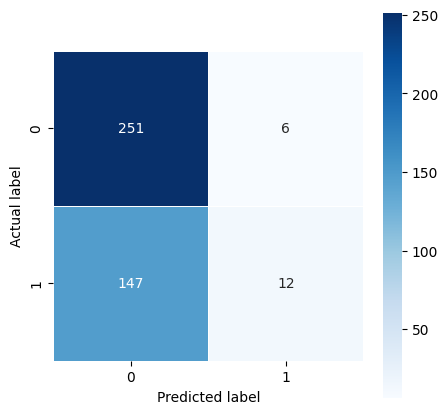

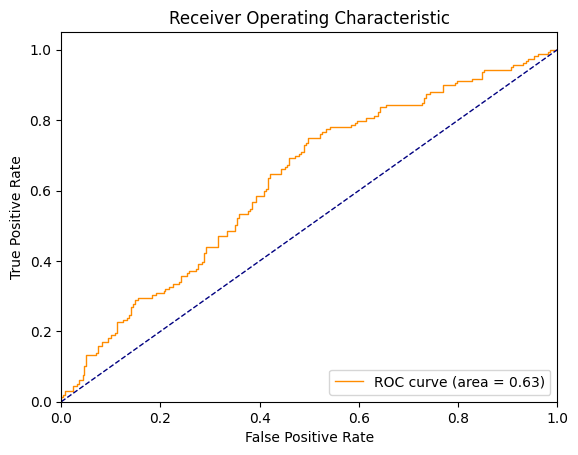

In [ ]:
#model2 = create_model(bert_model,50)
#model2.load_weights(models_path+'b-bert+vgg16.h5')
y_pred = (model.predict([test_image,test_input_ids,test_attention_masks])>0.5).astype(int)
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

# Print the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Compute false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_true, pred)
roc_auc = auc(fpr, tpr)

# Plot ROC AUC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# VGG19 + BanglaBERT

In [ ]:
#######################################             Model Defination
def create_model(bert_model,max_len):
  input_ids = Input(shape=(max_len,),dtype='int32')
  attention_masks = Input(shape=(max_len,),dtype='int32')
  output = bert_model([input_ids,attention_masks])
  output = output[0]                                ## 0 for distillbert
  output = Dense(1024,activation='relu')(output[:, 0, :])
  #output = Dropout(0.1)(output)
  #output = Dense(1,activation='sigmoid')(output[:, 0, :])
  model = Model(inputs = [input_ids,attention_masks],outputs = output)
  return model

In [ ]:
def bi_modal_attention(x, y):

    '''
    .  stands for dot product
    *  stands for elemwise multiplication
    {} stands for concatenation

    m1 = x . transpose(y) ||  m2 = y . transpose(x)
    n1 = softmax(m1)      ||  n2 = softmax(m2)
    o1 = n1 . y           ||  o2 = m2 . x
    a1 = o1 * x           ||  a2 = o2 * y

    return {a1, a2}

    '''

    m1 = dot([x, y], axes=[2, 2])
    n1 = Activation('softmax')(m1)
    o1 = dot([n1, y], axes=[2, 1])
    a1 = multiply([o1, x])

    m2 = dot([y, x], axes=[2, 2])
    n2 = Activation('softmax')(m2)
    o2 = dot([n2, x], axes=[2, 1])
    a2 = multiply([o2, y])

    return concatenate([a1, a2])

In [ ]:
## VGG19
base_model = VGG19(weights='imagenet', include_top=False,input_shape=(150, 150, 3))
base_model.trainable = False
y = base_model.output
pool = GlobalAveragePooling2D()(y)
#flatten = Flatten()(pool)
fc_layer_v = Dense(1024, activation='relu')(pool)
v = Reshape((32,32))(fc_layer_v)
#output = Dense(1, activation='sigmoid')(pool)
  # this is the model we will train
img_model = Model(inputs=base_model.input, outputs=fc_layer_v)


# text model
text_model = create_model(bert_model,50)
t = Reshape((32,32))(text_model.output)
vt_att = bi_modal_attention(v, t)
flat = Flatten()(vt_att)
# l1 =Dense(64, activation="relu")(con_layer)
# Fusion
con_layer = keras.layers.concatenate([img_model.output, text_model.output,flat])
#final_dense = Dense(10, activation="relu")(con_layer)
#dropout = Dropout(0.3)(final_dense)
out = Dense(1,activation='sigmoid')(con_layer)
com_model = Model(inputs = [img_model.input, text_model.input], outputs=out)
#com_model.summary()

In [ ]:
### Checkpoint
filepath = models_path + 'b-bert+vgg19_cross-1.h5'
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=2, save_best_only=True,
                                             save_weights_only=True, mode='max' )

In [ ]:
keras.backend.clear_session()
# 3e-4, 1e-4, 5e-5, 3e-5,1e-5
model = com_model
model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=['accuracy'])
#model.summary()

In [ ]:
model.fit([train_image,train_input_ids,train_attention_masks],
                    train_data['enc_label'],
                    validation_data = ([valid_image, valid_input_ids,valid_attention_masks], valid_data['enc_label']),
                    epochs=6,
                    batch_size=16,
                    callbacks = [checkpoint],
                    # class_weight = weight
          )

Epoch 1/6


211/211 [==============================] - ETA: 0s - loss: 5.3391 - accuracy: 0.5715
Epoch 1: val_accuracy improved from -inf to 0.50933, saving model to /content/drive/MyDrive/SC_project/MUTE/Models/b-bert+vgg19_cross-1.h5
211/211 [==============================] - 116s 332ms/step - loss: 5.3391 - accuracy: 0.5715 - val_loss: 6.1110 - val_accuracy: 0.5093
Epoch 2/6
211/211 [==============================] - ETA: 0s - loss: 2.6658 - accuracy: 0.6211
Epoch 2: val_accuracy improved from 0.50933 to 0.58933, saving model to /content/drive/MyDrive/SC_project/MUTE/Models/b-bert+vgg19_cross-1.h5
211/211 [==============================] - 79s 375ms/step - loss: 2.6658 - accuracy: 0.6211 - val_loss: 2.1317 - val_accuracy: 0.5893
Epoch 3/6
211/211 [==============================] - ETA: 0s - loss: 1.6375 - accuracy: 0.6487
Epoch 3: val_accuracy improved from 0.58933 to 0.62133, saving model to /content/drive/MyDrive/SC_project/MUTE/Models/b-bert+vgg19_cross-1.h5
211/211 [========================

13/13 [==============================] - 4s 150ms/step
[[109 148]
 [ 40 119]]
              precision    recall  f1-score   support

    not-hate       0.73      0.42      0.54       257
        hate       0.45      0.75      0.56       159

    accuracy                           0.55       416
   macro avg       0.59      0.59      0.55       416
weighted avg       0.62      0.55      0.55       416

Accuracy :  0.5480769230769231
Precison :  0.6222881729536582
Recall :  0.5480769230769231
F1 :  0.5452549514594196
Confusion Matrix:
[[109 148]
 [ 40 119]]


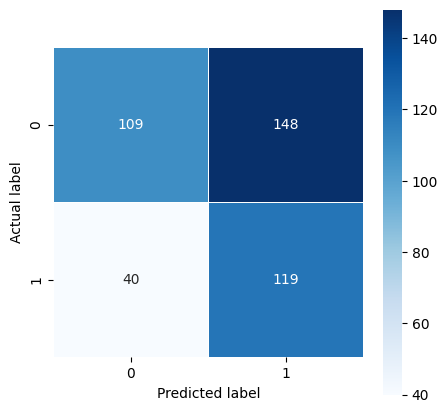

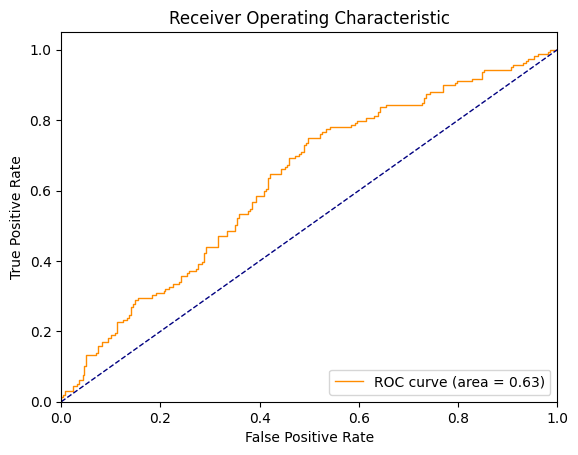

In [ ]:
## VGG19 + Bangla-BERT (Cross Modal)
#model2 = create_model(bert_model,50)
#model2.load_weights(models_path+'b-bert+vgg19_cross.h5')
y_pred = (model.predict([test_image,test_input_ids,test_attention_masks])>0.5).astype(int)
y_true = test_data['enc_label']
print_metrices(y_true,y_pred)

# Print the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion Matrix:')
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Compute false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_true, pred)
roc_auc = auc(fpr, tpr)

# Plot ROC AUC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()